In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
track_left = pd.read_csv("data/f1sim-ref-left.csv")
track_right = pd.read_csv("data/f1sim-ref-right.csv")
track_line = pd.read_csv("data/f1sim-ref-line.csv")
turns = pd.read_csv("data/f1sim-ref-turns.csv")

# Plotting the track

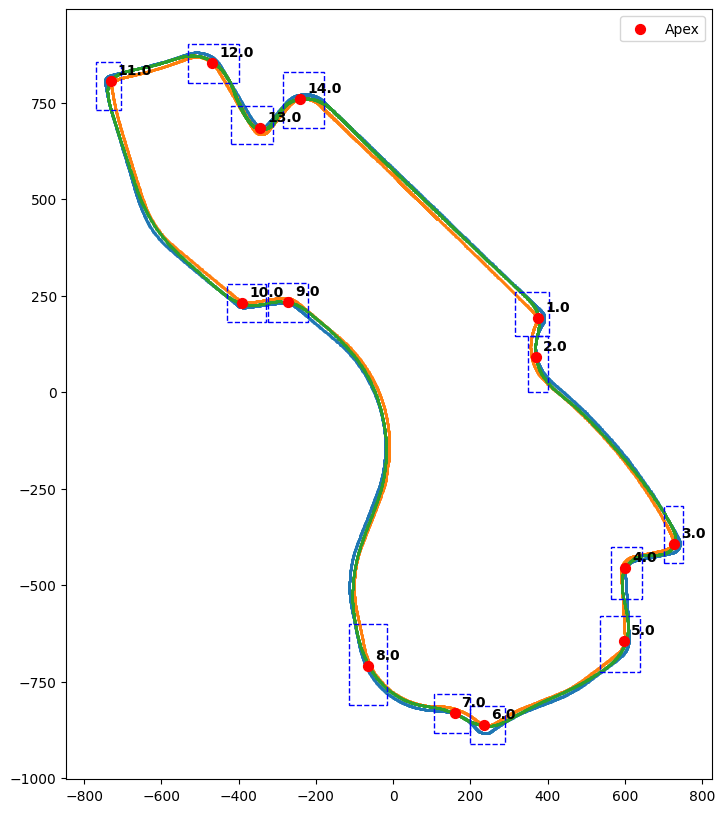

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(track_left["WORLDPOSX"], track_left["WORLDPOSY"], s=1)
ax.scatter(track_right["WORLDPOSX"], track_right["WORLDPOSY"], s=1)
ax.scatter(track_line["WORLDPOSX"], track_line["WORLDPOSY"], s=1)


# Plot apex dots
ax.scatter(turns["APEX_X1"], turns["APEX_Y1"], color="red", s=50, label="Apex")

# Draw boxes using corner coordinates
for _, row in turns.iterrows():
    x_min = min(row["CORNER_X1"], row["CORNER_X2"])
    x_max = max(row["CORNER_X1"], row["CORNER_X2"])
    y_min = min(row["CORNER_Y1"], row["CORNER_Y2"])
    y_max = max(row["CORNER_Y1"], row["CORNER_Y2"])

    # Rectangle patch
    rect = plt.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        fill=False,
        color="blue",
        linestyle="--"
    )
    ax.add_patch(rect)
    
    ax.annotate(str(row["TURN"]),
                (row["APEX_X1"], row["APEX_Y1"]),
                textcoords="offset points", xytext=(5, 5),
                color="black", fontsize=10, weight="bold")

# Formatting
ax.set_aspect("equal", "box")
ax.legend()
plt.show()



## Sectioning the Data by time

In [5]:
data = pd.read_csv('data/UNSW F12024.csv')

C:\Users\samue\AppData\Local\Temp\ipykernel_17956\314155161.py:1: DtypeWarning: Columns (70,71,73,74,82) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/UNSW F12024.csv')


In [20]:
run_data = data[(data['M_TRACKID'] == 0) & (data['M_LAPDISTANCE_1'] <= 1200)]

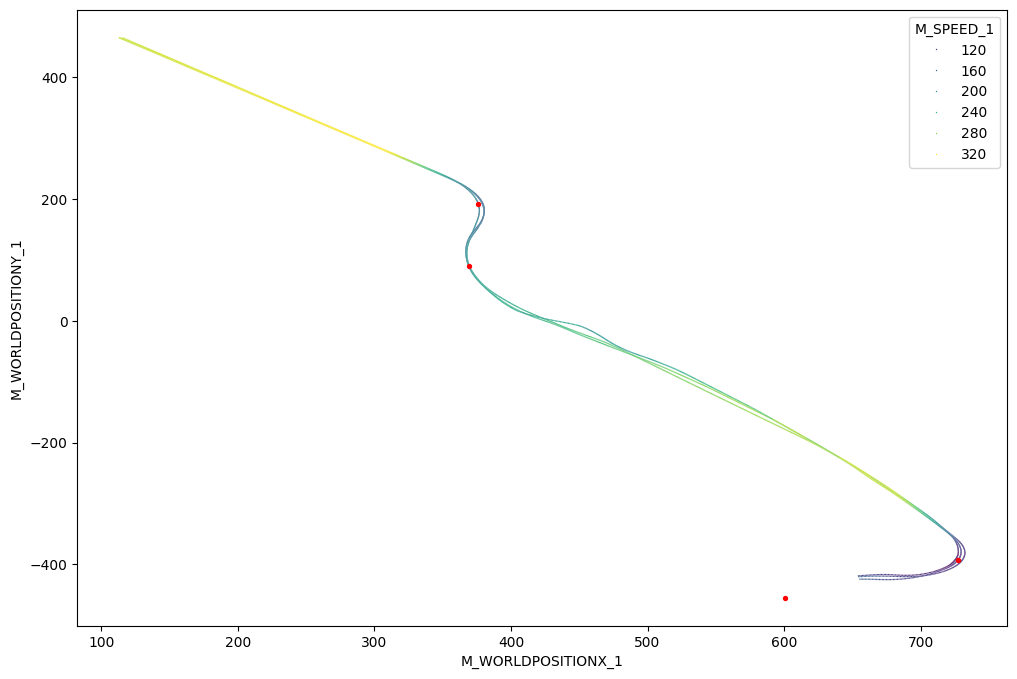

In [23]:
x_col="M_WORLDPOSITIONX_1" 
y_col="M_WORLDPOSITIONY_1"
color_col="M_SPEED_1"

plt.figure(figsize=(12, 8))
sns.scatterplot(data=run_data[run_data["M_SESSIONUID"] == run_data.M_SESSIONUID.unique()[4]], x=x_col, y=y_col, hue=color_col, palette="viridis", s=1)
plt.scatter(turns["APEX_X1"][:4], turns["APEX_Y1"][:4], color="red", s=8, label="Apex")
plt.show()


In [28]:
lap_1_data = run_data[run_data["M_CURRENTLAPNUM"] == 1]
lap_n_data = run_data[run_data["M_CURRENTLAPNUM"] > 1]

In [30]:
lap_1_data.to_csv("data/lap-1.csv", index=False)
lap_n_data.to_csv("data/lap-n.csv", index=False)